# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated, so we use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [2]:
import os
import pandas as pd

DATASET_PATH = os.path.join("datasets", "heart_attack_ds")

def load_data(path=DATASET_PATH):
    csv_path = os.path.join(path, "Heart_Attack_Analysis_Data.csv")
    return pd.read_csv(csv_path)

In [4]:
heart_condition = load_data()
heart_condition.head()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1


In [5]:
heart_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             303 non-null    int64
 1   Sex             303 non-null    int64
 2   CP_Type         303 non-null    int64
 3   BloodPressure   303 non-null    int64
 4   Cholestrol      303 non-null    int64
 5   BloodSugar      303 non-null    int64
 6   ECG             303 non-null    int64
 7   MaxHeartRate    303 non-null    int64
 8   ExerciseAngina  303 non-null    int64
 9   FamilyHistory   303 non-null    int64
 10  Target          303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


In [6]:
heart_condition.describe()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.204620,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.096825,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.000000,1.000000


# Data Pre-processing
We perform the following steps:
1. Determine number of null values in the dataset.
2. Convert Sex, CP_Type, BloodSugar, ECG, ExerciseAngina into categorical type from int type.
3. Perform One Hot Encoding on the column CP_Type and ECG
4. Remove duplicate rows

In [8]:
# 1. Count of null values in dataset
heart_condition.isnull().sum()

Age               0
Sex               0
CP_Type           0
BloodPressure     0
Cholestrol        0
BloodSugar        0
ECG               0
MaxHeartRate      0
ExerciseAngina    0
FamilyHistory     0
Target            0
dtype: int64

In [9]:
# 2. Typecast to Categorical columns in pandas
heart_condition['Sex'] = pd.Categorical(heart_condition.Sex)
heart_condition['CP_Type'] = pd.Categorical(heart_condition.CP_Type)
heart_condition['BloodSugar'] = pd.Categorical(heart_condition.BloodSugar)
heart_condition['ECG'] = pd.Categorical(heart_condition.ECG)
heart_condition['ExerciseAngina'] = pd.Categorical(heart_condition.ExerciseAngina)
heart_condition.dtypes

Age                  int64
Sex               category
CP_Type           category
BloodPressure        int64
Cholestrol           int64
BloodSugar        category
ECG               category
MaxHeartRate         int64
ExerciseAngina    category
FamilyHistory        int64
Target               int64
dtype: object

In [10]:
# 3. One hot encoding of CP_Type
one_hot_encoded_data=pd.get_dummies(heart_condition, columns=['CP_Type', 'ECG'])
print(one_hot_encoded_data)
heart_condition=one_hot_encoded_data

     Age Sex  BloodPressure  Cholestrol BloodSugar  MaxHeartRate  \
0     63   1            145         233          1           150   
1     37   1            130         250          0           187   
2     41   0            130         204          0           172   
3     56   1            120         236          0           178   
4     57   0            120         354          0           163   
..   ...  ..            ...         ...        ...           ...   
298   57   0            140         241          0           123   
299   45   1            110         264          0           132   
300   68   1            144         193          1           141   
301   57   1            130         131          0           115   
302   57   0            130         236          0           174   

    ExerciseAngina  FamilyHistory  Target  CP_Type_0  CP_Type_1  CP_Type_2  \
0                0              2       1          0          0          0   
1                0         

In [11]:
heart_condition['CP_Type_0'] = pd.Categorical(heart_condition.CP_Type_0)
heart_condition['CP_Type_1'] = pd.Categorical(heart_condition.CP_Type_1)
heart_condition['CP_Type_2'] = pd.Categorical(heart_condition.CP_Type_2)
heart_condition['CP_Type_3'] = pd.Categorical(heart_condition.CP_Type_3)
heart_condition['ECG_0'] = pd.Categorical(heart_condition.ECG_0)
heart_condition['ECG_1'] = pd.Categorical(heart_condition.ECG_1)
heart_condition['ECG_2'] = pd.Categorical(heart_condition.ECG_2)
heart_condition['Target'] = pd.Categorical(heart_condition.Target)
heart_condition.drop_duplicates()
heart_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             303 non-null    int64   
 1   Sex             303 non-null    category
 2   BloodPressure   303 non-null    int64   
 3   Cholestrol      303 non-null    int64   
 4   BloodSugar      303 non-null    category
 5   MaxHeartRate    303 non-null    int64   
 6   ExerciseAngina  303 non-null    category
 7   FamilyHistory   303 non-null    int64   
 8   Target          303 non-null    category
 9   CP_Type_0       303 non-null    category
 10  CP_Type_1       303 non-null    category
 11  CP_Type_2       303 non-null    category
 12  CP_Type_3       303 non-null    category
 13  ECG_0           303 non-null    category
 14  ECG_1           303 non-null    category
 15  ECG_2           303 non-null    category
dtypes: category(11), int64(5)
memory usage: 16.5 KB


# Data Summarization
We summarize the normalized data for insights using describe() function, outlier determination, and data aggregation functions

In [12]:
# Summarization of normalized data
heart_condition.describe()

,Age,BloodPressure,Cholestrol,MaxHeartRate,FamilyHistory
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.204620
std,9.082101,17.538143,51.830751,22.905161,1.096825
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,5.000000


In [13]:
#Cholestrol Outliers
Chol_Q1=heart_condition['Cholestrol'].quantile(0.25)
Chol_Q3=heart_condition['Cholestrol'].quantile(0.75)
Chol_IQR=Chol_Q3-Chol_Q1
print("Cholestrol IQR =",Chol_IQR)
Outlier_Low=Chol_Q1-1.5*Chol_IQR
Outlier_High=Chol_Q1+1.5*Chol_IQR                                                
print("Values of Cholestrol outside the range (",Outlier_Low,",",Outlier_High,") are outliers")                                                

#MaxHeartRate Outliers
MHR_Q1=heart_condition['MaxHeartRate'].quantile(0.25)
MHR_Q3=heart_condition['MaxHeartRate'].quantile(0.75)
MHR_IQR=MHR_Q3-MHR_Q1
print("MaxHeartRate IQR =",MHR_IQR)
Outlier_Low=MHR_Q1-1.5*MHR_IQR
Outlier_High=MHR_Q1+1.5*MHR_IQR                                                
print("Values of MaxHeartRate outside the range (",Outlier_Low,",",Outlier_High,") are outliers")                                 

Cholestrol IQR = 63.5
Values of Cholestrol outside the range ( 115.75 , 306.25 ) are outliers
MaxHeartRate IQR = 32.5
Values of MaxHeartRate outside the range ( 84.75 , 182.25 ) are outliers


In [14]:
# Multi-index pivot table
table=pd.pivot_table(heart_condition,index=['Sex', 'Target'])
table

Age  BloodPressure  Cholestrol  FamilyHistory  MaxHeartRate
Sex Target                                                                   
0   0       59.041667     146.125000  274.958333       1.041667    142.416667
    1       54.555556     128.736111  256.750000       1.277778    154.027778
1   0       56.087719     131.929825  246.061404       1.280702    138.403509
    1       50.903226     129.741935  230.989247       1.096774    161.903226

## Observations from summarized data
1. There are no null values in the dataset.
2. The average age of subjects is 54 years, minimum age is 29 years and maximum age is 77 years.
3. There is a large variance of Cholestrol values of subjects, as maximum is 564 and minimum is 126. 
4. The mean Cholestrol value is 246.26 units, while the standard deviation Cholestrol value is 51.83 units.
5. IQR for Cholestrol is 63.5 units. Values of Cholestrol outside the range (115.75, 306.25) are outliers.
6. IQR for MaxHeartRate is 32.5 bpm. Values of MaxHeartRate outside the range (84.75, 182.25) are outliers.

# Attribute selection for model building
Identification of relevant, irrelevant attributes for building model

In [15]:
heart_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             303 non-null    int64   
 1   Sex             303 non-null    category
 2   BloodPressure   303 non-null    int64   
 3   Cholestrol      303 non-null    int64   
 4   BloodSugar      303 non-null    category
 5   MaxHeartRate    303 non-null    int64   
 6   ExerciseAngina  303 non-null    category
 7   FamilyHistory   303 non-null    int64   
 8   Target          303 non-null    category
 9   CP_Type_0       303 non-null    category
 10  CP_Type_1       303 non-null    category
 11  CP_Type_2       303 non-null    category
 12  CP_Type_3       303 non-null    category
 13  ECG_0           303 non-null    category
 14  ECG_1           303 non-null    category
 15  ECG_2           303 non-null    category
dtypes: category(11), int64(5)
memory usage: 16.5 KB


## For numerical features and categorical output (Target), we use ANOVA. 
The numerical features include:
1. Age
2. BloodPressure
3. Cholestrol
4. MaxHeartRate
5. FamilyHistory

In [16]:
#ANOVA for numerical features vs Target:
import researchpy as rp
heart_condition['Target'].replace({0: 'LESS CHANCE', 1: 'MORE CHANCE'}, inplace= True)
heart_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             303 non-null    int64   
 1   Sex             303 non-null    category
 2   BloodPressure   303 non-null    int64   
 3   Cholestrol      303 non-null    int64   
 4   BloodSugar      303 non-null    category
 5   MaxHeartRate    303 non-null    int64   
 6   ExerciseAngina  303 non-null    category
 7   FamilyHistory   303 non-null    int64   
 8   Target          303 non-null    object  
 9   CP_Type_0       303 non-null    category
 10  CP_Type_1       303 non-null    category
 11  CP_Type_2       303 non-null    category
 12  CP_Type_3       303 non-null    category
 13  ECG_0           303 non-null    category
 14  ECG_1           303 non-null    category
 15  ECG_2           303 non-null    category
dtypes: category(10), int64(5), object(1)
memory usage: 18.5+ KB


In [17]:
rp.summary_cont(heart_condition['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,303.0,54.3663,9.0821,0.5218,53.3396,55.3931


In [18]:
rp.summary_cont(heart_condition['Age'].groupby(heart_condition['Target']))

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LESS CHANCE,138,56.6014,7.9621,0.6778,55.2612,57.9417
MORE CHANCE,165,52.4970,9.5507,0.7435,51.0289,53.9651


In [19]:
import scipy.stats as stats

stats.f_oneway(heart_condition['Age'][heart_condition['Target'] == 'LESS CHANCE'],
               heart_condition['Age'][heart_condition['Target'] == 'MORE CHANCE'])

F_onewayResult(statistic=16.116699823188288, pvalue=7.524801303442268e-05)

### Age is a relevant attribute
Hypothesis
H0: Means of both distributions (less chance/more chance of heart attack) are same; 
H1: Means of both distributions (less chance/more chance of heart attack) are significantly different

As p-value is less than 0.05 (for 95% confidence), H0 is rejected and H1 is accepted.
There is a statistically significant difference between the groups (less chance/more chance of heart attack) and their effects due to the variable age as, F= 16.116699823188288, pvalue=7.524801303442268e-05.

Thus, age is a relevant attribute.

In [20]:
rp.summary_cont(heart_condition['BloodPressure'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,BloodPressure,303.0,131.6238,17.5381,1.0075,129.6411,133.6065


In [23]:
rp.summary_cont(heart_condition['BloodPressure'].groupby(heart_condition['Target']))

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LESS CHANCE,138,134.3986,18.7299,1.5944,131.2457,137.5514
MORE CHANCE,165,129.3030,16.1696,1.2588,126.8175,131.7886


In [21]:
stats.f_oneway(heart_condition['BloodPressure'][heart_condition['Target'] == 'LESS CHANCE'],
               heart_condition['BloodPressure'][heart_condition['Target'] == 'MORE CHANCE'])

F_onewayResult(statistic=6.458168674005333, pvalue=0.011546059200233376)

### BloodPressure is a relevant attribute
Hypothesis H0: Means of both distributions (less chance/more chance of heart attack) are same; 
H1: Means of both distributions (less chance/more chance of heart attack) are significantly different

As p-value is less than 0.05 (for 95% confidence), H0 is rejected and H1 is accepted.
There is a statistically significant difference between the groups (less chance/more chance of heart attack) and their effects due to the variable BloodPressure as, F= 6.458168674005333, pvalue=0.011546059200233376.

Thus, BloodPressure is a relevant attribute.

In [22]:
rp.summary_cont(heart_condition['Cholestrol'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Cholestrol,303.0,246.264,51.8308,2.9776,240.4046,252.1235


In [24]:
rp.summary_cont(heart_condition['Cholestrol'].groupby(heart_condition['Target']))

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LESS CHANCE,138,251.0870,49.4546,4.2099,242.7623,259.4117
MORE CHANCE,165,242.2303,53.5529,4.1691,233.9983,250.4623


In [25]:
stats.f_oneway(heart_condition['Cholestrol'][heart_condition['Target'] == 'LESS CHANCE'],
               heart_condition['Cholestrol'][heart_condition['Target'] == 'MORE CHANCE'])

F_onewayResult(statistic=2.2029834463803746, pvalue=0.1387903269560108)

### Cholestrol is an irrelevant attribute
Hypothesis 
H0: Means of both distributions (less chance/more chance of heart attack) are same; 
H1: Means of both distributions (less chance/more chance of heart attack) are significantly different

As p-value is greater than 0.05 (for 95% confidence), H0 is accepted and H1 is rejected. There is no statistically significant difference between the groups (less chance/more chance of heart attack) and their effects due to the variable cholestrol as, F= 2.2029834463803746, pvalue=0.1387903269560108.

Thus, Cholestrol is an irrelevant attribute.

In [189]:
rp.summary_cont(heart_condition['MaxHeartRate'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MaxHeartRate,303.0,149.6469,22.9052,1.3159,147.0574,152.2363


In [26]:
rp.summary_cont(heart_condition['MaxHeartRate'].groupby(heart_condition['Target']))

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LESS CHANCE,138,139.1014,22.5988,1.9237,135.2974,142.9055
MORE CHANCE,165,158.4667,19.1743,1.4927,155.5192,161.4141


In [190]:
stats.f_oneway(heart_condition['MaxHeartRate'][heart_condition['Target'] == 'LESS CHANCE'],
               heart_condition['MaxHeartRate'][heart_condition['Target'] == 'MORE CHANCE'])

F_onewayResult(statistic=65.12010440125097, pvalue=1.6973376386560805e-14)

### MaxHeartRate is a relevant attribute
Hypothesis 
H0: Means of both distributions (less chance/more chance of heart attack) are same; 
H1: Means of both distributions (less chance/more chance of heart attack) are significantly different

As p-value is less than 0.05 (for 95% confidence), H0 is accepted and H1 is rejected. There is statistically significant difference between the groups (less chance/more chance of heart attack) and their effects due to the variable MaxHeartRate as, F= 65.12010440125097, pvalue=1.6973376386560805e-14.

Thus, MaxHeartRate is a relevant attribute.

In [191]:
rp.summary_cont(heart_condition['FamilyHistory'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,FamilyHistory,303.0,1.2046,1.0968,0.063,1.0806,1.3286


In [27]:
rp.summary_cont(heart_condition['FamilyHistory'].groupby(heart_condition['Target']))

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LESS CHANCE,138,1.2391,1.1498,0.0979,1.0456,1.4327
MORE CHANCE,165,1.1758,1.0532,0.0820,1.0139,1.3376


In [192]:
stats.f_oneway(heart_condition['FamilyHistory'][heart_condition['Target'] == 'LESS CHANCE'],
               heart_condition['FamilyHistory'][heart_condition['Target'] == 'MORE CHANCE'])

F_onewayResult(statistic=0.25024928475305025, pvalue=0.6172651404419242)

### FamilyHistory is an irrelevant attribute
Hypothesis
H0: Means of both distributions (less chance/more chance of heart attack) are same;
H1: Means of both distributions (less chance/more chance of heart attack) are significantly different

As p-value is greater than 0.05 (for 95% confidence), H0 is accepted and H1 is rejected. There is no statistically significant difference between the groups (less chance/more chance of heart attack) and their effects due to the variable familyhistory as, F= 0.25024928475305025, pvalue=0.6172651404419242.

Thus, FamilyHistory is an irrelevant attribute.

## For categorical features and categorical output (Target), we  to convert the categorical features into numerical features and find correlation using Pearson's correlation. 
The categorical features** include:
1. Sex
2. BloodSugar
3. ExerciseAngina
4. CP_Type_0
5. CP_Type_1
6. CP_Type_2
7. CP_Type_3
8. ECG_0
9. ECG_1
10. ECG_2

**All these features are binary categorical features with 0 or 1 values.

In [29]:
import numpy as np
from scipy.stats import pearsonr

heart_condition['Target'].replace({'LESS CHANCE':0, 'MORE CHANCE':1}, inplace= True)
heart_condition['Sex'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['Sex'])
print("Pearson's Correlation for Sex and Target:", corr)

Pearson's Correlation for Sex and Target: -0.2809365755017673


In [30]:
heart_condition['BloodSugar'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['BloodSugar'])
print("Pearson's Correlation for BloodSugar and Target:", corr)

Pearson's Correlation for BloodSugar and Target: -0.02804576027271287


In [31]:
heart_condition['ExerciseAngina'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['ExerciseAngina'])
print("Pearson's Correlation for ExerciseAngina and Target:", corr)

Pearson's Correlation for ExerciseAngina and Target: -0.4367570833533035


In [32]:
heart_condition['CP_Type_0'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['CP_Type_0'])
print("Pearson's Correlation for CP_Type_0 and Target:", corr)

Pearson's Correlation for CP_Type_0 and Target: -0.5160146415680599


In [33]:
heart_condition['CP_Type_1'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['CP_Type_1'])
print("Pearson's Correlation for CP_Type_1 and Target:", corr)

Pearson's Correlation for CP_Type_1 and Target: 0.24587909539147906


In [34]:
heart_condition['CP_Type_2'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['CP_Type_2'])
print("Pearson's Correlation for CP_Type_0 and Target:", corr)

Pearson's Correlation for CP_Type_0 and Target: 0.3167421581955403


In [35]:
heart_condition['CP_Type_3'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['CP_Type_3'])
print("Pearson's Correlation for CP_Type_0 and Target:", corr)

Pearson's Correlation for CP_Type_0 and Target: 0.08695687464637601


In [36]:
heart_condition['ECG_0'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['ECG_0'])
print("Pearson's Correlation for ECG_0 and Target:", corr)

Pearson's Correlation for ECG_0 and Target: -0.15977519309753516


In [37]:
heart_condition['ECG_1'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['ECG_1'])
print("Pearson's Correlation for ECG_1 and Target:", corr)

Pearson's Correlation for ECG_1 and Target: 0.17532180367281475


In [38]:
heart_condition['ECG_2'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['ECG_2'])
print("Pearson's Correlation for ECG_2 and Target:", corr)

Pearson's Correlation for ECG_2 and Target: -0.06841023951783204


### Based on the Pearson's correlation scores the following categorical feature(s) is/are selected:
Sex, ExerciseAngina, CP_Type_0, CP_Type_1, and CP_Type_2 (as their absolute score is close to or greater than 0.25)

The following features are not relevant:
BloodSugar, ECG_0, ECG_1, ECG_2, and CP_Type_3

# List of selected features
1. Age
2. BloodPressure
3. MaxHeartRate
4. Sex
5. ExerciseAngina
6. CP_Type_0
7. CP_Type_1
8. CP_Type_2

# Data Visualization 

Saving figure attribute_histogram_plots


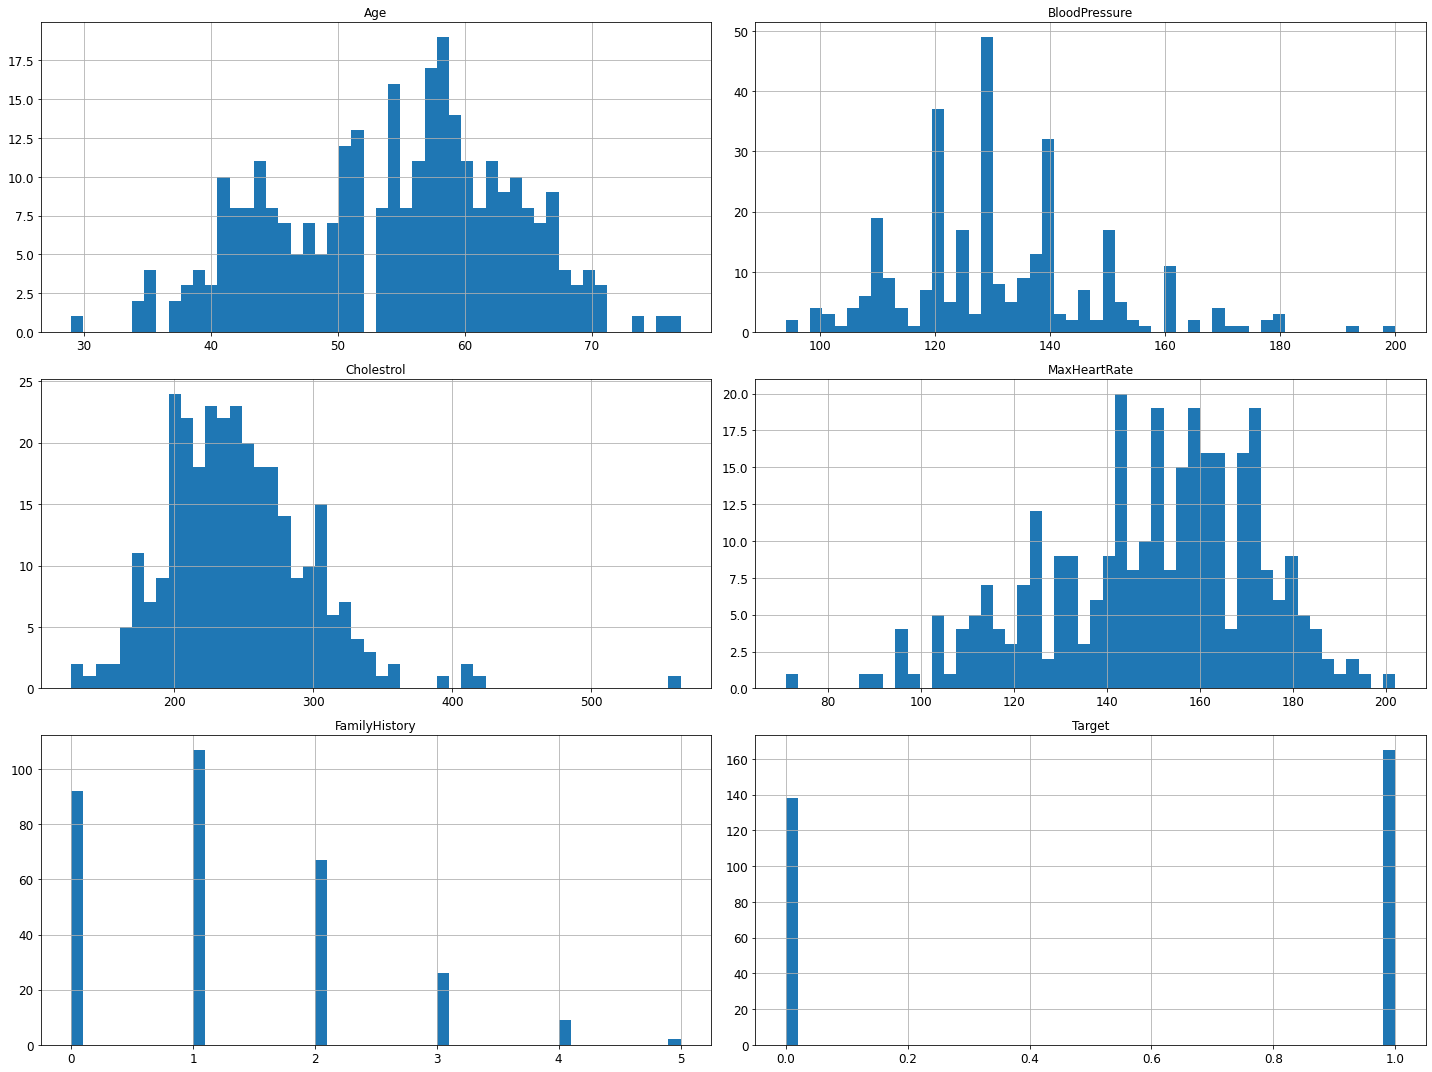

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
heart_condition.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

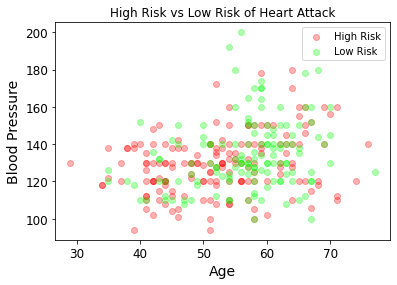

In [40]:
H = heart_condition[heart_condition.Target == 1]
L = heart_condition[heart_condition.Target == 0]
plt.title("High Risk vs Low Risk of Heart Attack")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.scatter(H.Age, H.BloodPressure, color = "red", label = "High Risk", alpha = 0.3)
plt.scatter(L.Age, L.BloodPressure, color = "lime", label = "Low Risk", alpha = 0.3)
plt.legend()
plt.show()

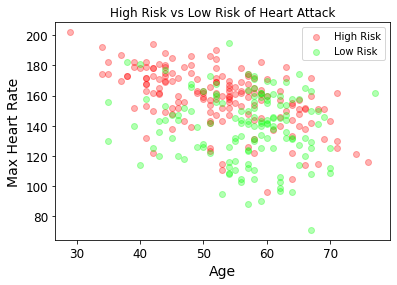

In [41]:
plt.title("High Risk vs Low Risk of Heart Attack")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.scatter(H.Age, H.MaxHeartRate, color = "red", label = "High Risk", alpha = 0.3)
plt.scatter(L.Age, L.MaxHeartRate, color = "lime", label = "Low Risk", alpha = 0.3)
plt.legend()
plt.show()

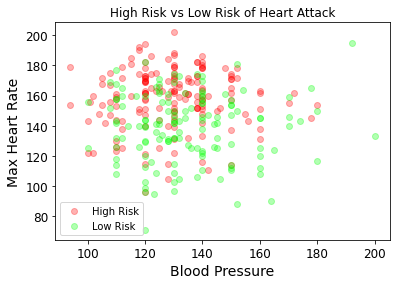

In [42]:
plt.title("High Risk vs Low Risk of Heart Attack")
plt.xlabel("Blood Pressure")
plt.ylabel("Max Heart Rate")
plt.scatter(H.BloodPressure, H.MaxHeartRate, color = "red", label = "High Risk", alpha = 0.3)
plt.scatter(L.BloodPressure, L.MaxHeartRate, color = "lime", label = "Low Risk", alpha = 0.3)
plt.legend()
plt.show()

## Observations
1. Age, Cholestrol, and MaxHeartRate appear to be normally distributed.
2. Age appears to be a symmetric distribution with a mean of approximately 55 years.
3. Cholestrol also appears to be symmetrically distributed.
4. Outliers of Cholestrol appear to lie 350 units and beyond.
5. MaxHeartRate appears to be left tailed with outliers less than 120 units.
6. BloodPressure appears to have outliers beyond 160 units.
7. Scatter-plots for high risk vs low risk of heart attack are shown for various groups of selected variables. Some observations from the scatter-plots include:

    a. High risk in subjects of 40-50 age group with blood pressure of 120-140.
    
    b. Higher the max heart rate higher the risk.
    
    c. Aged subjects have a high risk even for lower values of max heart rate.
    
    d. Higher blood pressure combined with high max heart rate increases the risk.

# Model Building and Analytics

In [43]:
import scipy
import numpy
import sklearn
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalization using min-max normalization
scaled_features = scaler.fit_transform(heart_condition.values)
heart_condition = pd.DataFrame(scaled_features, index=heart_condition.index, columns=heart_condition.columns)
heart_condition.head()

,Age,Sex,BloodPressure,Cholestrol,BloodSugar,MaxHeartRate,ExerciseAngina,FamilyHistory,Target,CP_Type_0,CP_Type_1,CP_Type_2,CP_Type_3,ECG_0,ECG_1,ECG_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
from sklearn.model_selection import train_test_split
# separate array into input and output components
X = heart_condition.iloc[:, [0,1,2,5,6,9,10,11]].values
y = heart_condition.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [45]:
len(X_train)

242

In [46]:
len(X_test)

61

## 1. Gaussian NB

In [84]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [85]:
probs_log1=clf.predict_proba(X_test)
print(probs_log1)

[[9.99009620e-01 9.90379626e-04]
 [6.99418083e-01 3.00581917e-01]
 [6.53167392e-01 3.46832608e-01]
 [9.96870709e-01 3.12929067e-03]
 [3.73837114e-02 9.62616289e-01]
 [7.22116211e-01 2.77883789e-01]
 [9.96246170e-01 3.75382998e-03]
 [9.23278557e-01 7.67214425e-02]
 [9.99285705e-01 7.14294882e-04]
 [9.98201951e-01 1.79804855e-03]
 [2.09882803e-02 9.79011720e-01]
 [2.44058372e-01 7.55941628e-01]
 [9.72777169e-01 2.72228308e-02]
 [5.41294210e-04 9.99458706e-01]
 [1.17917345e-03 9.98820827e-01]
 [3.80577262e-01 6.19422738e-01]
 [8.80005031e-01 1.19994969e-01]
 [6.18430889e-03 9.93815691e-01]
 [9.99758846e-01 2.41153519e-04]
 [2.08094830e-03 9.97919052e-01]
 [5.51067122e-01 4.48932878e-01]
 [7.00276757e-01 2.99723243e-01]
 [2.78224933e-02 9.72177507e-01]
 [9.99396359e-01 6.03640961e-04]
 [3.63987040e-04 9.99636013e-01]
 [6.64568413e-02 9.33543159e-01]
 [7.74875837e-01 2.25124163e-01]
 [8.28818710e-01 1.71181290e-01]
 [5.26045917e-04 9.99473954e-01]
 [1.12798516e-03 9.98872015e-01]
 [3.062930

No Skill: ROC AUC=0.500
Gaussian NB: ROC AUC=0.882


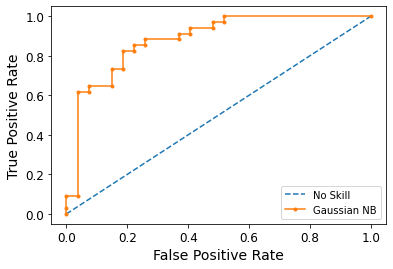

In [86]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
positive_probs = probs_log1[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
positive_auc = roc_auc_score(y_test, positive_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gaussian NB: ROC AUC=%.3f' % (positive_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
positive_fpr, positive_tpr, _ = roc_curve(y_test, positive_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(positive_fpr, positive_tpr, marker='.', label='Gaussian NB')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend

pyplot.legend()

# show the plot
pyplot.show()

In [87]:
print("Accuracy Score:", clf.score(X_test,y_test))

Accuracy Score: 0.8032786885245902


In [88]:
from sklearn.metrics import precision_recall_fscore_support

y_pred=clf.predict(X_test)
print(y_pred)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]


In [89]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8006535947712419, 0.8006535947712419, 0.8006535947712419, None)

## Analysis Results: Gaussian NB
1. AUC-ROC curve is presented above with ROC AUC=0.882 for Gaussian Naive Bayes:
2. Accuracy Score: 0.80
3. Precision: 0.80
4. Recall: 0.80
5. F-score: 0.80

## 2. Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [91]:
probs_log1=clf.predict_proba(X_test)
print(probs_log1)

[[0.92689335 0.07310665]
 [0.4832319  0.5167681 ]
 [0.44036443 0.55963557]
 [0.87027075 0.12972925]
 [0.32711172 0.67288828]
 [0.57845267 0.42154733]
 [0.83689711 0.16310289]
 [0.72745753 0.27254247]
 [0.75016747 0.24983253]
 [0.89472271 0.10527729]
 [0.2673896  0.7326104 ]
 [0.25409632 0.74590368]
 [0.79218276 0.20781724]
 [0.22481819 0.77518181]
 [0.05880735 0.94119265]
 [0.43418194 0.56581806]
 [0.62521054 0.37478946]
 [0.18342004 0.81657996]
 [0.92085889 0.07914111]
 [0.12746977 0.87253023]
 [0.54104921 0.45895079]
 [0.59482582 0.40517418]
 [0.46776069 0.53223931]
 [0.88600326 0.11399674]
 [0.20075402 0.79924598]
 [0.16895491 0.83104509]
 [0.59768357 0.40231643]
 [0.62684212 0.37315788]
 [0.05781694 0.94218306]
 [0.27722512 0.72277488]
 [0.31137229 0.68862771]
 [0.83518358 0.16481642]
 [0.0533735  0.9466265 ]
 [0.31456286 0.68543714]
 [0.15597239 0.84402761]
 [0.68956546 0.31043454]
 [0.76096027 0.23903973]
 [0.20757252 0.79242748]
 [0.85419657 0.14580343]
 [0.34715686 0.65284314]


No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.871


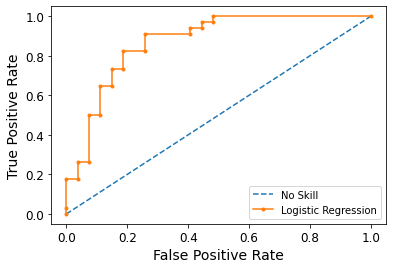

In [92]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
positive_probs = probs_log1[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
positive_auc = roc_auc_score(y_test, positive_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (positive_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
positive_fpr, positive_tpr, _ = roc_curve(y_test, positive_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(positive_fpr, positive_tpr, marker='.', label='Logistic Regression')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend

pyplot.legend()

# show the plot
pyplot.show()

In [93]:
print("Accuracy Score:", clf.score(X_test,y_test))

Accuracy Score: 0.819672131147541


In [94]:
y_pred=clf.predict(X_test)
print(y_pred)

[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [95]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8220720720720721, 0.8115468409586056, 0.8146920740127037, None)

## Analysis Results: Logistic Regression
1. AUC-ROC curve is presented above with ROC AUC=0.871 for Logistic Regression:
2. Accuracy Score: 0.82
3. Precision: 0.82
4. Recall: 0.81
5. F-score: 0.81

## 3. Decision Tree Classifier 

In [96]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
probs_log1=clf.predict_proba(X_test)
print(probs_log1)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


No Skill: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.745


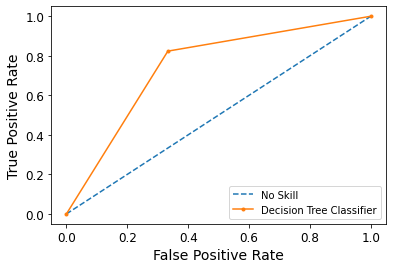

In [98]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
positive_probs = probs_log1[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
positive_auc = roc_auc_score(y_test, positive_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree Classifier: ROC AUC=%.3f' % (positive_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
positive_fpr, positive_tpr, _ = roc_curve(y_test, positive_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(positive_fpr, positive_tpr, marker='.', label='Decision Tree Classifier')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend

pyplot.legend()

# show the plot
pyplot.show()

In [99]:
print("Accuracy Score:", clf.score(X_test,y_test))

Accuracy Score: 0.7540983606557377


In [100]:
y_pred=clf.predict(X_test)
print(y_pred)

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


In [101]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.7533783783783784, 0.7450980392156863, 0.7473073736536868, None)

## Analysis Results: Decision Tree Classifier
1. AUC-ROC curve is presented above with ROC AUC=0.745 for Decision Tree Classifier
2. Accuracy Score: 0.75
3. Precision: 0.75
4. Recall: 0.74
5. F-score: 0.75

# 4. Random Forest (Ensemble) Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
probs_log1=clf.predict_proba(X_test)
print(probs_log1)

[[0.96 0.04]
 [0.43 0.57]
 [0.49 0.51]
 [1.   0.  ]
 [0.79 0.21]
 [0.42 0.58]
 [0.84 0.16]
 [0.57 0.43]
 [0.91 0.09]
 [0.9  0.1 ]
 [0.16 0.84]
 [0.13 0.87]
 [0.53 0.47]
 [0.09 0.91]
 [0.05 0.95]
 [0.5  0.5 ]
 [0.51 0.49]
 [0.09 0.91]
 [0.92 0.08]
 [0.1  0.9 ]
 [0.28 0.72]
 [0.62 0.38]
 [0.56 0.44]
 [0.94 0.06]
 [0.25 0.75]
 [0.11 0.89]
 [0.59 0.41]
 [0.41 0.59]
 [0.02 0.98]
 [0.18 0.82]
 [0.48 0.52]
 [0.65 0.35]
 [0.01 0.99]
 [0.22 0.78]
 [0.07 0.93]
 [1.   0.  ]
 [0.66 0.34]
 [0.04 0.96]
 [0.98 0.02]
 [0.2  0.8 ]
 [0.6  0.4 ]
 [0.29 0.71]
 [0.01 0.99]
 [0.79 0.21]
 [0.67 0.33]
 [0.31 0.69]
 [0.01 0.99]
 [0.03 0.97]
 [0.66 0.34]
 [0.   1.  ]
 [0.06 0.94]
 [0.42 0.58]
 [0.08 0.92]
 [0.37 0.63]
 [0.02 0.98]
 [0.95 0.05]
 [0.05 0.95]
 [0.17 0.83]
 [0.4  0.6 ]
 [0.02 0.98]
 [0.22 0.78]]


No Skill: ROC AUC=0.500
Random Forest (Ensemble) Classifier: ROC AUC=0.869


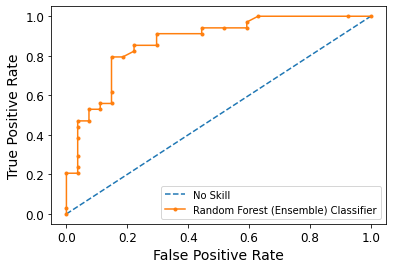

In [104]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
positive_probs = probs_log1[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
positive_auc = roc_auc_score(y_test, positive_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest (Ensemble) Classifier: ROC AUC=%.3f' % (positive_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
positive_fpr, positive_tpr, _ = roc_curve(y_test, positive_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(positive_fpr, positive_tpr, marker='.', label='Random Forest (Ensemble) Classifier')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend

pyplot.legend()

# show the plot
pyplot.show()

In [105]:
print("Accuracy Score:", clf.score(X_test,y_test))

Accuracy Score: 0.7868852459016393


In [106]:
y_pred=clf.predict(X_test)
print(y_pred)

[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [107]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.7877252252252251, 0.778322440087146, 0.7809997238331953, None)

## Analysis Results: Random Forest (Ensemble) Classifier
1. AUC-ROC curve is presented above with ROC AUC=0.869 for Random Forest (Ensemble) Classifier
2. Accuracy Score: 0.79
3. Precision: 0.79
4. Recall: 0.78
5. F-score: 0.78

# 5. K-Nearest Neighbor (KNN) Classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [109]:
probs_log1=clf.predict_proba(X_test)
print(probs_log1)

[[1.  0. ]
 [0.4 0.6]
 [0.2 0.8]
 [1.  0. ]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [1.  0. ]
 [0.2 0.8]
 [0.2 0.8]
 [0.6 0.4]
 [0.  1. ]
 [0.  1. ]
 [0.4 0.6]
 [0.8 0.2]
 [0.  1. ]
 [0.8 0.2]
 [0.  1. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.4 0.6]
 [0.8 0.2]
 [0.2 0.8]
 [0.  1. ]
 [0.4 0.6]
 [0.6 0.4]
 [0.  1. ]
 [0.2 0.8]
 [0.6 0.4]
 [1.  0. ]
 [0.  1. ]
 [0.2 0.8]
 [0.  1. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [0.2 0.8]
 [0.  1. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.4 0.6]
 [0.  1. ]
 [0.  1. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.2 0.8]
 [0.4 0.6]
 [0.  1. ]
 [0.2 0.8]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.  1. ]
 [0.  1. ]]


No Skill: ROC AUC=0.500
K-Nearest Neighbor Classifier: ROC AUC=0.856


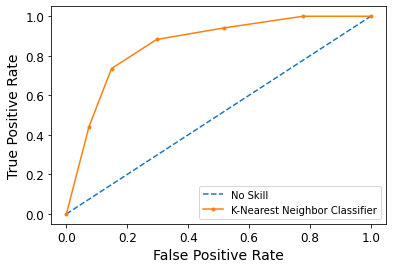

In [110]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
positive_probs = probs_log1[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
positive_auc = roc_auc_score(y_test, positive_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('K-Nearest Neighbor Classifier: ROC AUC=%.3f' % (positive_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
positive_fpr, positive_tpr, _ = roc_curve(y_test, positive_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(positive_fpr, positive_tpr, marker='.', label='K-Nearest Neighbor Classifier')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend

pyplot.legend()

# show the plot
pyplot.show()

In [111]:
print("Accuracy Score:", clf.score(X_test,y_test))

Accuracy Score: 0.8032786885245902


In [112]:
y_pred=clf.predict(X_test)
print(y_pred)

[0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [113]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8077803203661327, 0.7930283224400871, 0.7966666666666666, None)

## Analysis Results: K-Nearest Neighbor Classifier
1. AUC-ROC curve is presented above with ROC AUC=0.856 for K-Nearest Neighbor Classifier
2. Accuracy Score: 0.80
3. Precision: 0.81
4. Recall: 0.79
5. F-score: 0.80

# Summary of Performances of various models
## 1. Gaussian NB
1. AUC-ROC curve is presented above with ROC AUC=0.882 for Gaussian Naive Bayes:
2. Accuracy Score: 0.80
3. Precision: 0.80
4. Recall: 0.80
5. F-score: 0.80

## 2.Logistic Regression¶
1. AUC-ROC curve is presented above with ROC AUC=0.871 for Logistic Regression:
2. Accuracy Score: 0.82
3. Precision: 0.82
4. Recall: 0.81
5. F-score: 0.81

## 3. Decision Tree Classifier
1. AUC-ROC curve is presented above with ROC AUC=0.745 for Decision Tree Classifier
2. Accuracy Score: 0.75
3. Precision: 0.75
4. Recall: 0.74
5. F-score: 0.75

## 4. Random Forest (Ensemble) Classifier
1. AUC-ROC curve is presented above with ROC AUC=0.869 for Random Forest (Ensemble) Classifier
2. Accuracy Score: 0.79
3. Precision: 0.79
4. Recall: 0.78
5. F-score: 0.78

## 5. K-Nearest Neighbor Classifier¶
1. AUC-ROC curve is presented above with ROC AUC=0.856 for K-Nearest Neighbor Classifier
2. Accuracy Score: 0.80
3. Precision: 0.81
4. Recall: 0.79
5. F-score: 0.80

## Clearly, Logistic Regression outperforms all the other models with an accuracy score of 0.82 and a precision score of 0.82.
This may be because  Logistic regression performs better when the number of noise variables is less than or equal to the number of explanatory variables and the random forest has a higher true and false positive rate as the number of explanatory variables increases in a dataset.

# Thank You!!